# Time Series - Exploratory Data Analysis

#### We will explore how electricity consumption and production in Germany have varied over time.



Data Downlod link https://data.open-power-system-data.org/time_series/

##### Electricity production and consumption are reported as daily totals in gigawatt-hours (GWh) from 2006 to 2018

`Date — The date (yyyy-mm-dd format)`

`Consumption — Electricity consumption in GWh`

`Wind — Wind power production in GWh`

`Solar — Solar power production in GWh`

`Wind+Solar — Sum of wind and solar power production in GWh`


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
opsd_daily = pd.read_csv("opsd-master/opsd_germany_daily.csv")

In [3]:
opsd_daily

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


`As we are dealing with Time series analysis, we have to check type of Date column`

In [4]:
opsd_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 5 columns):
Date           4383 non-null object
Consumption    4383 non-null float64
Wind           2920 non-null float64
Solar          2188 non-null float64
Wind+Solar     2187 non-null float64
dtypes: float64(4), object(1)
memory usage: 171.3+ KB


`we need to convert date format to from object to DateTime format`

In [5]:
opsd_daily["Date"] = opsd_daily["Date"].astype('datetime64[ns]') 

In [6]:
opsd_daily.Date.head()

0   2006-01-01
1   2006-01-02
2   2006-01-03
3   2006-01-04
4   2006-01-05
Name: Date, dtype: datetime64[ns]

#### Now we will create some more column related to time series such as **Year, Month, Weekday Name Weekday, Is Weekend**

In [7]:
opsd_daily['Year'] = opsd_daily.Date.apply(lambda x: x.year)
opsd_daily['Month'] = opsd_daily.Date.apply(lambda x: x.month)
opsd_daily['Weekday Name'] = opsd_daily.Date.apply(lambda x: x.weekday_name )
opsd_daily['Weekday'] = opsd_daily.Date.apply(lambda x: x.dayofweek)

opsd_daily["Is Weekend"] = opsd_daily["Weekday"].isin((5,6)) #this will give us True False value where there is a weekend or not,
                                                             #This will help us in further analysis where we want to look at weekend conumption

C:\Users\OWAIS\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [8]:
opsd_daily.head()

,Date,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,6,True
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,0,False
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,1,False
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,2,False
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,3,False


In [9]:
opsd_daily["Weekday Name"].value_counts() #It's a good practice to check this in between data manupulation because sometime weird things happens 
                                          #speciall in TimeSeries analysis.

Sunday       627
Tuesday      626
Thursday     626
Monday       626
Friday       626
Saturday     626
Wednesday    626
Name: Weekday Name, dtype: int64

`Setting Date Column to index column this will help us in further analysis`

In [10]:
opsd_daily = opsd_daily.set_index("Date")

In [11]:
opsd_daily.head()

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Weekday Name,Weekday,Is Weekend
Date,,,,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Sunday,6,True
2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Monday,0,False
2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Tuesday,1,False
2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Wednesday,2,False
2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Thursday,3,False


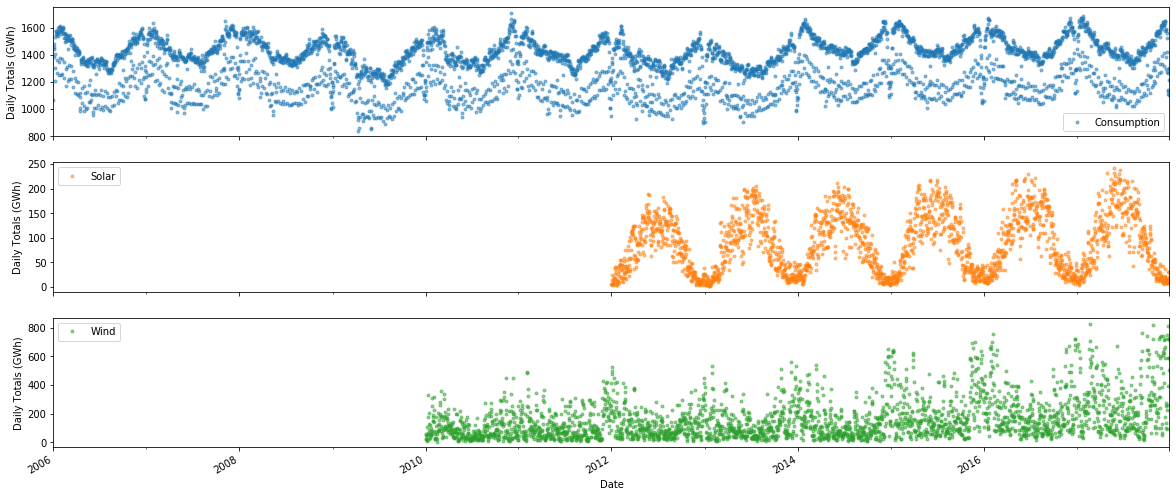

In [12]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(20, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

#### We can already see some interesting patterns emerge:

Electricity consumption is highest in winter, presumably due to electric heating and increased lighting usage, and lowest in summer.


Electricity consumption appears to split into two clusters — one with oscillations centered roughly around 1400 GWh, and another with fewer and more scattered data points, centered roughly around 1150 GWh. 

We might guess that these clusters correspond with weekdays and weekends, and we will investigate this further shortly.


Solar power production is highest in summer, when sunlight is most abundant, and lowest in winter.


Wind power production is highest in winter, presumably due to stronger winds and more frequent storms, and lowest in summer.


There appears to be a strong increasing trend in wind power production over the years.


All three time series clearly exhibit periodicity—often referred to as seasonality in time series analysis—in which a pattern repeats again and again at regular time intervals. The Consumption, Solar, and Wind time series oscillate between high and low values on a yearly time scale, corresponding with the seasonal changes in weather over the year. However, seasonality in general does not have to correspond with the meteorological seasons. For example, retail sales data often exhibits yearly seasonality with increased sales in November and December, leading up to the holidays.

Seasonality can also occur on other time scales. The plot above suggests there may be some weekly seasonality in Germany’s electricity consumption, corresponding with weekdays and weekends.

`Let’s plot the time series in a single year to investigate further.`

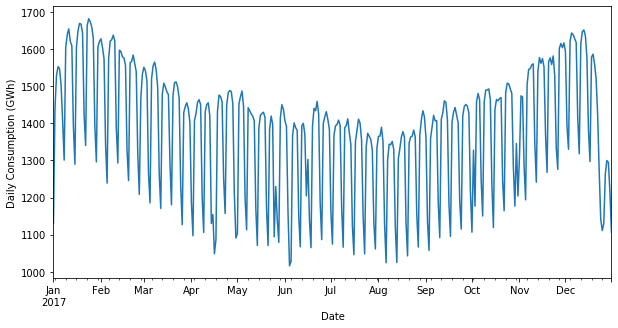

In [13]:
ax = opsd_daily.loc['2017', 'Consumption'].plot(figsize=(10, 5));
ax.set_ylabel('Daily Consumption (GWh)');

**Now we can clearly see the weekly oscillations. Another interesting feature that becomes apparent at this level of granularity is the drastic decrease in electricity consumption in early January and late December, during the holidays.**

### Let’s zoom in further and look at just January and February.

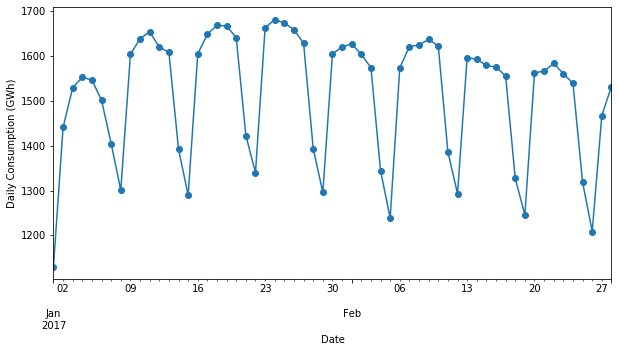

In [14]:
ax = opsd_daily.loc['2017-01':'2017-02', 'Consumption'].plot(marker='o', linestyle='-',figsize=(10, 5))
ax.set_ylabel('Daily Consumption (GWh)');

`Grouping on  the weekday to see mean  behaviour by day of week`

In [15]:
mean_by_weekday = opsd_daily.loc["2017",["Consumption","Weekday"]].groupby("Weekday").mean()

In [16]:
mean_by_weekday

,Consumption
Weekday,
0,1427.530056
1,1466.728105
2,1482.121188
3,1471.985919
4,1446.916857
5,1242.253721
6,1146.877459


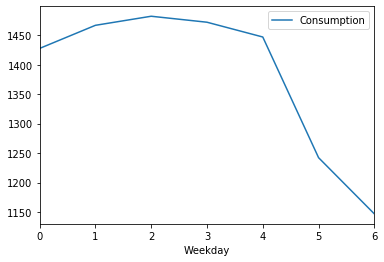

In [17]:
mean_by_weekday.plot();

`Making this plot more interpretable`

In [18]:
day_of_week = {0:"Monday",1:"Tuesday",2:"Wednesday",3:"Thursday",4:"Friday",5:"Saturday",6:"Sunday"}

In [19]:
new_index = mean_by_weekday.index.map(day_of_week)

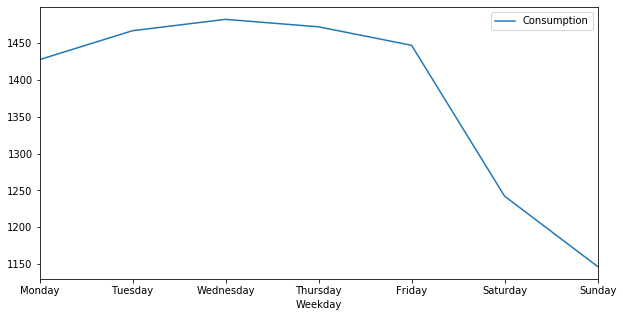

In [20]:
mean_by_weekday.set_index(new_index).plot(figsize=(10,5));

`Digging more deeper`

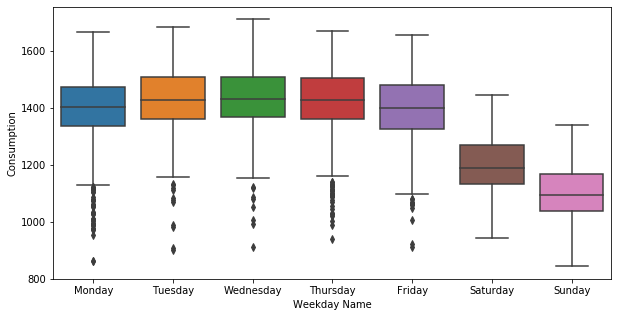

In [21]:
plt.figure(figsize=(10,5))
sns.boxplot(
    x="Weekday Name",
    y="Consumption",
    data=opsd_daily,
    order=day_of_week.values());

#### As expected, electricity consumption is significantly higher on weekdays than on weekends.
#### The low outliers on weekdays are presumably during holidays.

## Seasonality 

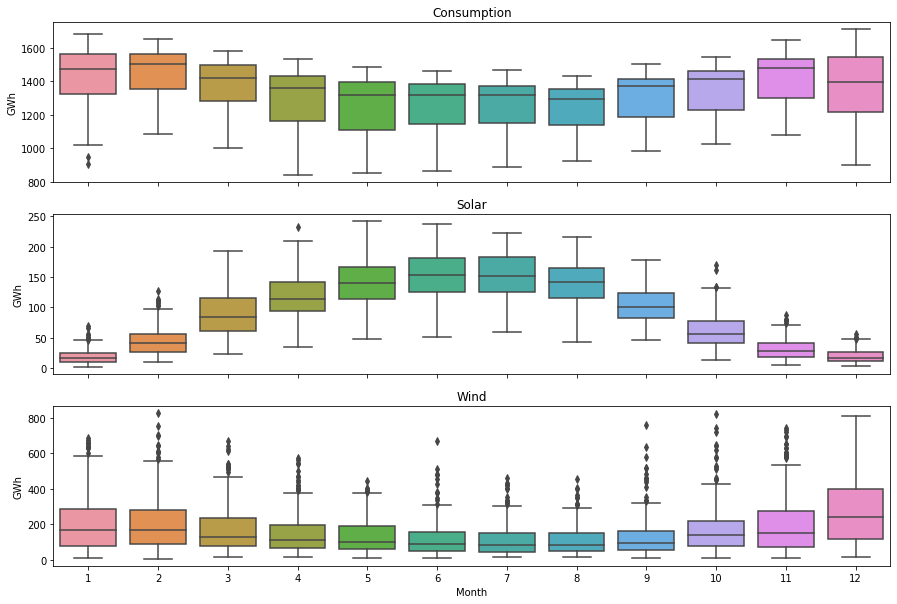

In [22]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)
for name, ax in zip(["Consumption","Solar","Wind"],axes):
    sns.boxplot(data=opsd_daily, x="Month", y=name, ax=ax)
    ax.set_ylabel("GWh")
    ax.set_title(name)
    
#removing x labels

    if ax != axes[-1]:
        ax.set_xlabel("")

**These box plots confirm the yearly seasonality that we saw in earlier plots and provide some additional insights:**


* Although electricity consumption is generally higher in winter and lower in summer, the median and lower two quartiles are lower in December and January compared to November and February, likely due to businesses being closed over the holidays. We saw this in the time series for the year 2017, and the box plot confirms that this is consistent pattern throughout the years.


* While solar and wind power production both exhibit a yearly seasonality, the wind power distributions have many more outliers, reflecting the effects of occasional extreme wind speeds associated with storms and other transient weather conditions.

### Here we are using Resampling (downsampling) technique, to compare wind and solar power production with electricity consumption, and how has this ratio changed over time

For now we are Resampling (downsampling) the data from daily to monthly, to get this into prespective.

In [23]:
import matplotlib.dates as mdates
data_columns = ['Consumption', 'Wind', 'Solar', 'Wind+Solar']
opsd_monthly = opsd_daily[data_columns].resample('M').sum(min_count=28) # from daily to monthly

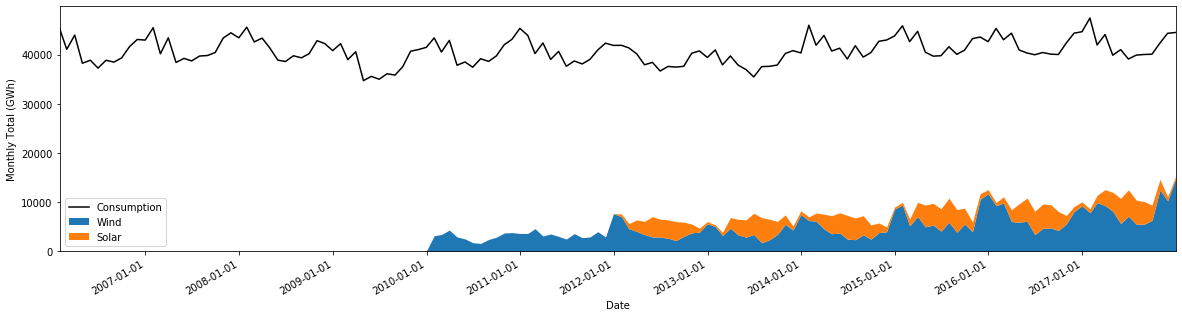

In [24]:
fig, ax = plt.subplots(figsize=(20,5))
ax.plot(opsd_monthly['Consumption'], color='black', label='Consumption')
opsd_monthly[['Wind', 'Solar']].plot.area(ax=ax, linewidth=0)
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.legend()
ax.set_ylabel('Monthly Total (GWh)');

`At this monthly time scale, we can clearly see the yearly seasonality in each time series, and it is also evident that electricity consumption has been fairly stable over time, while wind power production has been growing steadily, with wind + solar power comprising an increasing share of the electricity consumed.`

##### `Let’s explore this further by resampling to annual frequency and computing the ratio of Wind+Solar to Consumption for each year.`

In [26]:
# Compute the annual sums, setting the value to NaN for any year which has
# fewer than 360 days of data
opsd_annual = opsd_daily[data_columns].resample('A').sum(min_count=360)
# The default index of the resampled DataFrame is the last day of each year,
# ('2006-12-31', '2007-12-31', etc.) so to make life easier, set the index
# to the year component
opsd_annual = opsd_annual.set_index(opsd_annual.index.year)
opsd_annual.index.name = 'Year'
# Compute the ratio of Wind+Solar to Consumption
opsd_annual['Wind+Solar/Consumption'] = opsd_annual['Wind+Solar'] / opsd_annual['Consumption']
opsd_annual.tail(3)

,Consumption,Wind,Solar,Wind+Solar,Wind+Solar/Consumption
Year,,,,,
2015,505264.56300,77468.994,34907.138,112376.132,0.222410
2016,505927.35400,77008.126,34562.824,111570.950,0.220528
2017,504736.36939,102667.365,35882.643,138550.008,0.274500


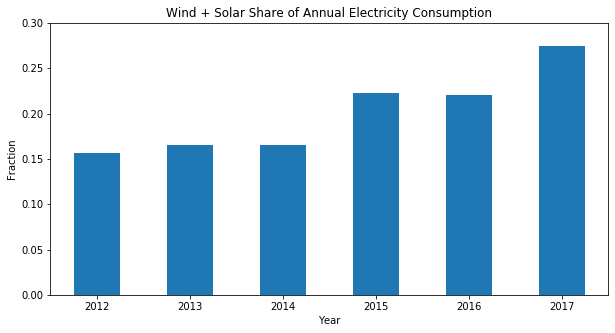

In [31]:
# Plot from 2012 onwards, because there is no solar production data in earlier years
plt.figure(figsize=(10,5))
ax = opsd_annual.loc[2012:, 'Wind+Solar/Consumption'].plot.bar(color='C0')
ax.set_ylabel('Fraction')
ax.set_ylim(0, 0.3)
ax.set_title('Wind + Solar Share of Annual Electricity Consumption')
plt.xticks(rotation=0);

`We can see that wind + solar production as a share of annual electricity consumption has been increasing from about 15% in 2012 to about 27% in 2017.`

#### So what we have seen so far in this Time series analysis.


* Trend in electricity consumption over the years.

* Variation in wind and solar production with respect to season. 

* Long-term trends in electricity consumption, solar power, and wind power

* Comparison of production of wind and solar and with consumption of electricity, and how has this ratio changed over time.